## Results of Host Prediction
### Dataset: EMBL mapping, Vertebrates, Non-IDV

**Models**: FNN, CNN, RNN, LSTM, TF

**Positional Embedding**: Sin-Cos

**Maximum Sequence Length**: 1036

**Classification**: Multi-class

**\# classes**: 5

**\# train samples** = 

**\# validation samples** = 

**\# test samples** = 

In [1]:
import seaborn

In [2]:
! pip install statannotations
! pip install statsmodels
! pip install seaborn==0.11.0

In [87]:
import sys
import os
from scipy.stats import mannwhitneyu, wilcoxon
from statannotations.Annotator import Annotator
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/grads/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/embl',
 '/home/grads/blessyantony/anaconda3/envs/zoonosis/lib/python310.zip',
 '/home/grads/blessyantony/anaconda3/envs/zoonosis/lib/python3.10',
 '/home/grads/blessyantony/anaconda3/envs/zoonosis/lib/python3.10/lib-dynload',
 '',
 '/home/grads/blessyantony/anaconda3/envs/zoonosis/lib/python3.10/site-packages',
 '/home/grads/blessyantony/anaconda3/envs/zoonosis/lib/python3.10/site-packages/PyQt5_sip-12.11.0-py3.10-linux-x86_64.egg',
 '/home/grads/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/embl/../../../../..',
 '/home/grads/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/embl/../../../..',
 '/home/grads/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/embl/../../..',
 '/home/grads/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/embl/../..',
 '/home/grads/blessyantony/dev/gi

In [4]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import mannwhitneyu
from src.utils import visualization_utils
from statannotations.Annotator import Annotator

In [5]:
sns.__version__

'0.11.0'

In [6]:
itr_col = "itr"
experiment_col = "experiment"
y_true_col = "y_true"
human_col = "Human"
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['figure.autolayout'] = True

DEFAULT_FIGURE_CONFIG = {
    "figsize": (10, 10),
    "xtick.labelsize": 18,
    "ytick.labelsize": 18    
}




In [8]:
df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..", "..", "..", "output/evaluation/uniref90/20240517/host_multi_all_models/host_multi_all_models_evaluation_metrics.csv"))
df.drop(columns="Unnamed: 0", inplace=True)
df

,itr,experiment,auroc,auprc
0,0,LR-maxitr5000,0.893114,0.434882
1,1,LR-maxitr5000,0.895628,0.435733
2,2,LR-maxitr5000,0.897219,0.442181
3,3,LR-maxitr5000,0.897307,0.462020
4,4,LR-maxitr5000,0.899442,0.446247
5,0,RF,0.868121,0.397746
6,1,RF,0.861747,0.383125
7,2,RF,0.867166,0.402957
8,3,RF,0.865816,0.412637
9,4,RF,0.876119,0.380268


In [14]:
df = df.replace({"experiment": {"LR-maxitr5000": "LR", "Protein-BERT": "ProteinBERT", "VirPro-BERT": "VirProBERT"}})

In [116]:
pairs = [("VirProBERT", "ProteinBERT"),
        ("VirProBERT", "Transformer-Encoder"),
        ("VirProBERT", "LSTM"),
        ("VirProBERT", "CNN"),
        ("VirProBERT", "SVM"),
        ("VirProBERT", "RF"),
        ("VirProBERT", "LR")]

def plot_boxplot_w_stat_tests(df, metric, location, ylim):
    virprobert_values = df[df["experiment"] == "VirProBERT"][metric].values
    proteinbert_values = df[df["experiment"] == "ProteinBERT"][metric].values
    cnn_values = df[df["experiment"] == "CNN"][metric].values
    lstm_values = df[df["experiment"] == "LSTM"][metric].values
    tf_enc_values = df[df["experiment"] == "Transformer-Encoder"][metric].values
    lr_values = df[df["experiment"] == "LR"][metric].values
    rf_values = df[df["experiment"] == "RF"][metric].values
    svm_values = df[df["experiment"] == "SVM"][metric].values
    
    p_values = [mannwhitneyu(virprobert_values, proteinbert_values, alternative="greater").pvalue,
                mannwhitneyu(virprobert_values, tf_enc_values, alternative="greater").pvalue,
                mannwhitneyu(virprobert_values, lstm_values, alternative="greater").pvalue,
                mannwhitneyu(virprobert_values, cnn_values, alternative="greater").pvalue,
                mannwhitneyu(virprobert_values, svm_values, alternative="greater").pvalue,
                mannwhitneyu(virprobert_values, rf_values, alternative="greater").pvalue,
                mannwhitneyu(virprobert_values, lr_values, alternative="greater").pvalue]
    print(f"p_values= {p_values}")
    formatted_pvalues = [f"p={p_value:.2e}" for p_value in p_values]
    print(formatted_pvalues)
    
    DEFAULT_FIGURE_CONFIG = {
        "figsize": (16, 10),
        "xtick.labelsize": 20,
        "ytick.labelsize": 20
    }

    plotting_parameters = {
        'data':    df,
        'x':       'experiment',
        'y':       metric,
        "linewidth": 2.5,
        #"edgecolor": "black",
        #"linecolor": "black",
#         "boxprops": {"edgecolor": "black"},
#         "whiskerprops": {"color": "black"},
#         "flierprops": {"color": "black"},
#         "fliersize": 7.0,
#         "medianprops": {"linewidth": 2.5},
        'palette': "deep",
        #"notch": True,
        #"fill": True
    }

    visualization_utils.pre_plot_config(DEFAULT_FIGURE_CONFIG)
    ax = sns.boxplot(**plotting_parameters)
    #sns.swarmplot(data=df, x="experiment", y=metric, ax=ax, color="black")
    
    annotator = Annotator(ax, pairs, **plotting_parameters)
    #annotator.set_custom_annotations(p_values)
    annotator.configure(loc=location)
    annotator.set_pvalues(p_values)
    #annotator.configure(test="Wilcoxon", loc=location)
    ax.set_xlabel("", size=20, labelpad=5)
    ax.set_ylabel(metric.upper(), size=22)
    #plt.xticks(rotation=45)
    visualization_utils.wrap_xticklabels(ax, label_width=10, break_long_words=False)
    #annotator.apply_and_annotate()
    annotator.annotate()
    ax.set_ylim(*ylim)
    
    plt.tight_layout()
    plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", "..", f"output/visualization/uniref90/20240517/host_multi_all_models/host_multi_all_models_{metric}_boxplot_stat.pdf"), bbox_inches="tight")
    plt.show()

p_values= [0.007936507936507936, 0.003968253968253968, 0.003968253968253968, 0.003968253968253968, 0.003968253968253968, 0.003968253968253968, 0.003968253968253968]
['p=7.94e-03', 'p=3.97e-03', 'p=3.97e-03', 'p=3.97e-03', 'p=3.97e-03', 'p=3.97e-03', 'p=3.97e-03']
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

ProteinBERT vs. VirProBERT: Custom statistical test, P_val:7.937e-03
Transformer-Encoder vs. VirProBERT: Custom statistical test, P_val:3.968e-03
LSTM vs. VirProBERT: Custom statistical test, P_val:3.968e-03
CNN vs. VirProBERT: Custom statistical test, P_val:3.968e-03
SVM vs. VirProBERT: Custom statistical test, P_val:3.968e-03
RF vs. VirProBERT: Custom statistical test, P_val:3.968e-03
LR vs. VirProBERT: Custom statistical test, P_val:3.968e-03


<Figure size 640x480 with 0 Axes>

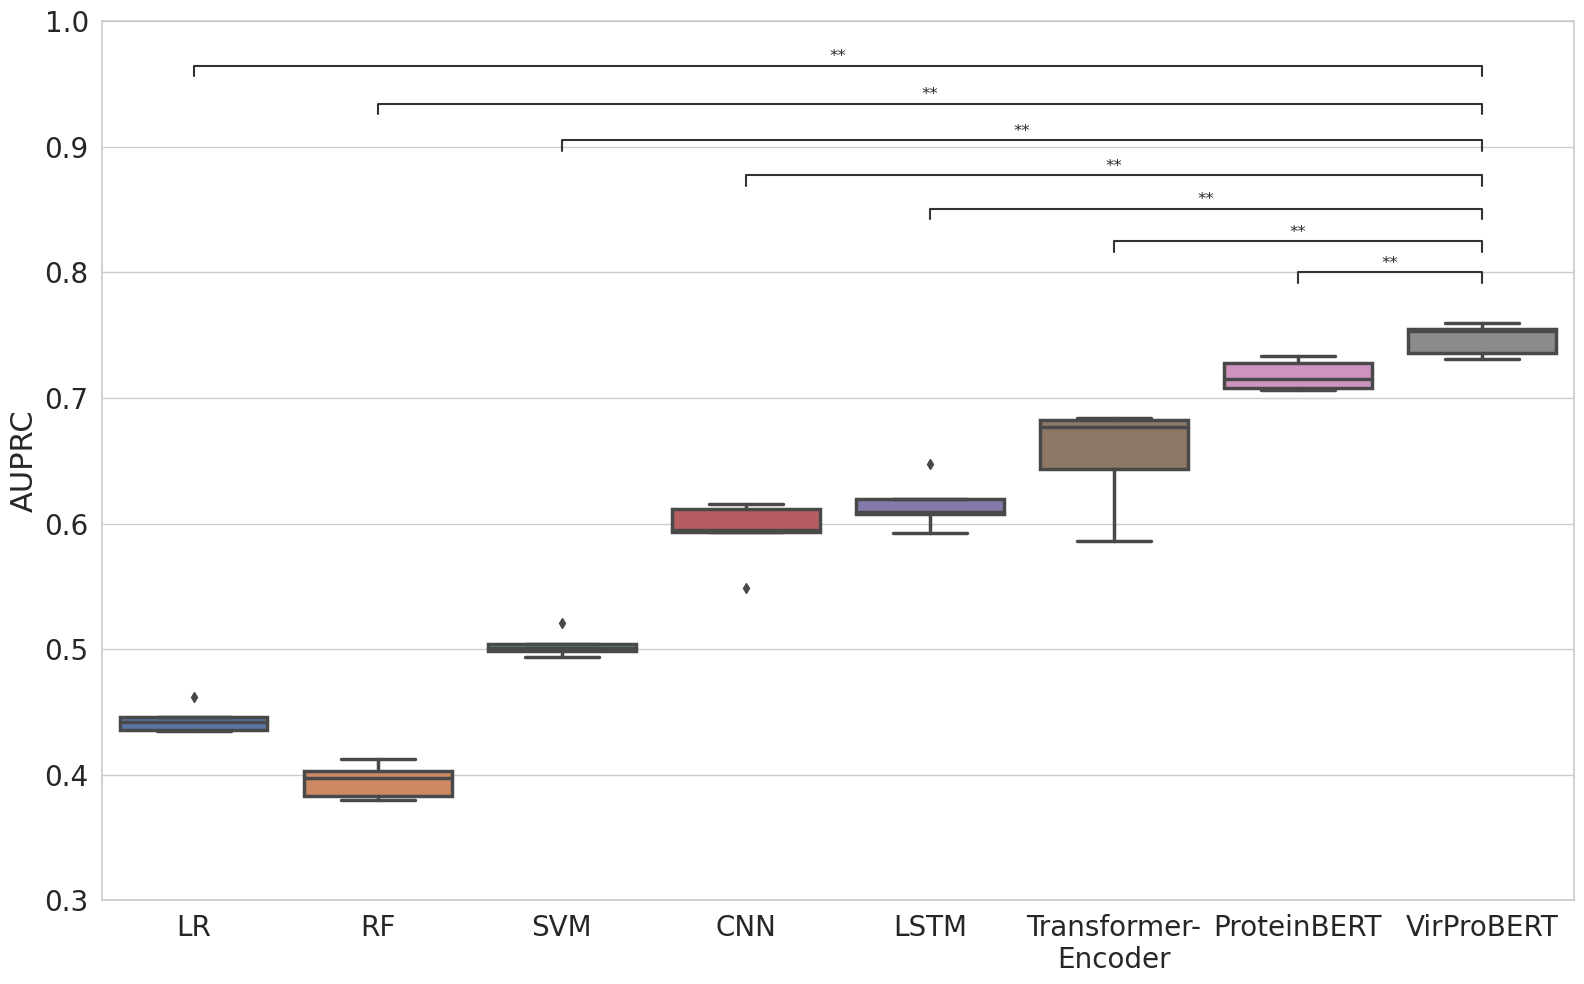

In [117]:
plot_boxplot_w_stat_tests(df, "auprc", "outside", ylim=(0.3, 1))

p_values= [0.27380952380952384, 0.003968253968253968, 0.003968253968253968, 0.003968253968253968, 0.003968253968253968, 0.003968253968253968, 0.003968253968253968]
['p=2.74e-01', 'p=3.97e-03', 'p=3.97e-03', 'p=3.97e-03', 'p=3.97e-03', 'p=3.97e-03', 'p=3.97e-03']
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

ProteinBERT vs. VirProBERT: Custom statistical test, P_val:2.738e-01
Transformer-Encoder vs. VirProBERT: Custom statistical test, P_val:3.968e-03
LSTM vs. VirProBERT: Custom statistical test, P_val:3.968e-03
CNN vs. VirProBERT: Custom statistical test, P_val:3.968e-03
SVM vs. VirProBERT: Custom statistical test, P_val:3.968e-03
RF vs. VirProBERT: Custom statistical test, P_val:3.968e-03
LR vs. VirProBERT: Custom statistical test, P_val:3.968e-03


<Figure size 640x480 with 0 Axes>

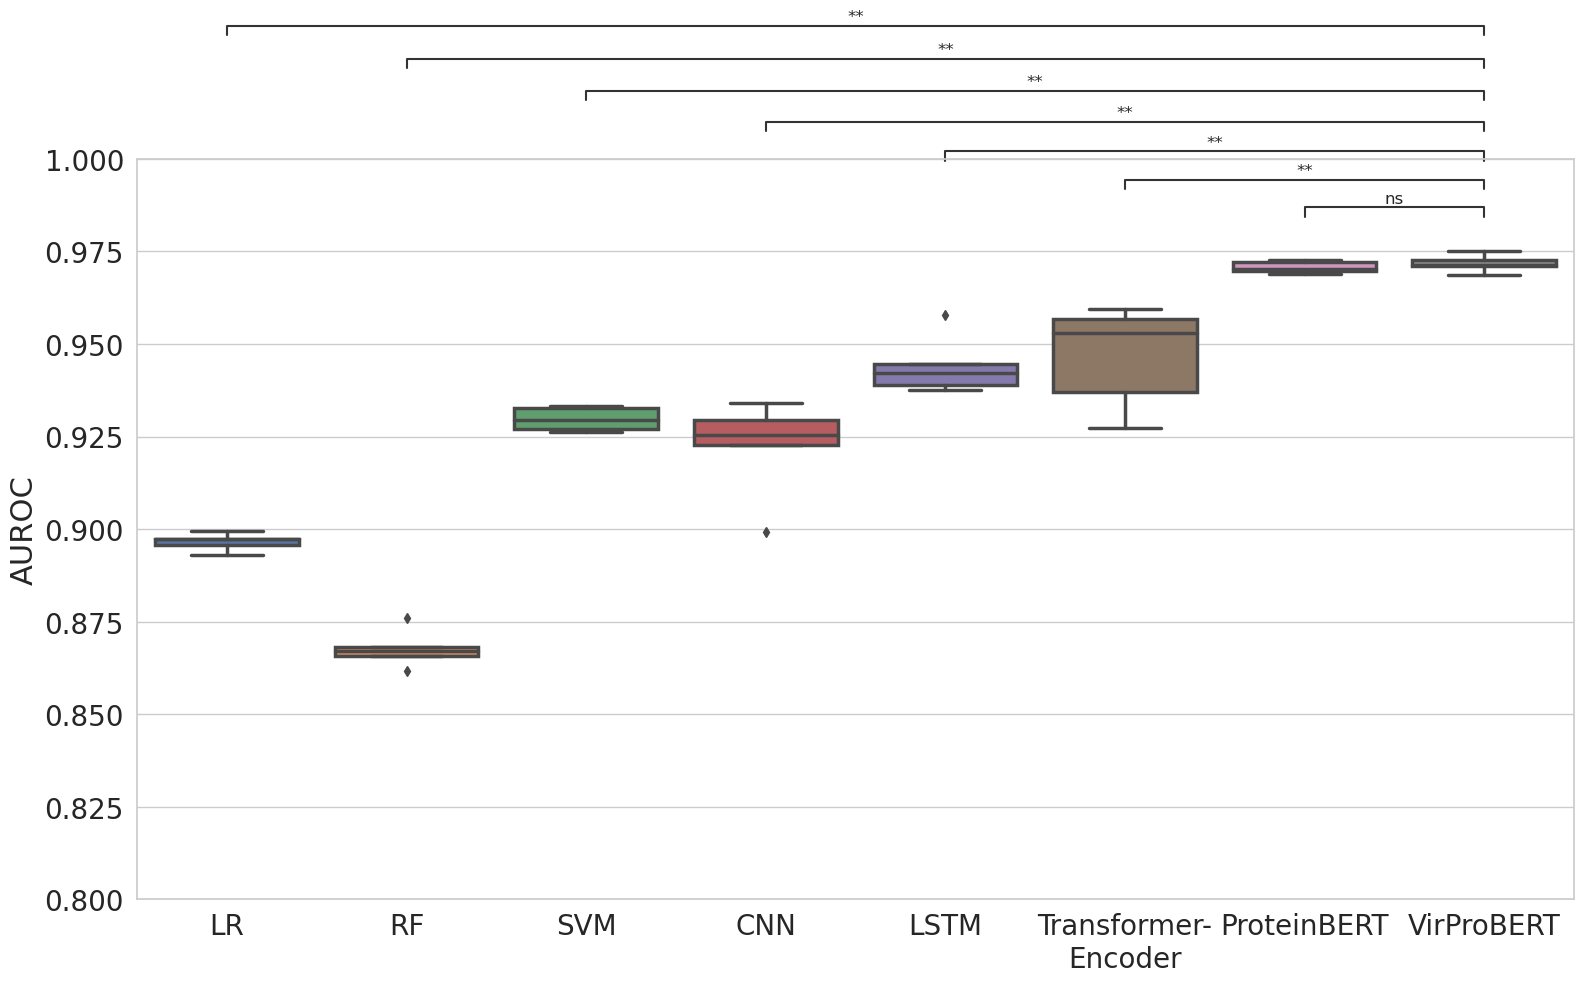

In [109]:
plot_boxplot_w_stat_tests(df, "auroc", location="outside", ylim=(0.8, 1.0))